In [1]:
%matplotlib notebook

In [2]:
import csv
import os
import pandas as pd
import numpy as np
from datetime import date
import collections
import matplotlib.pyplot as plt

In [3]:
os.chdir('/Users/ruddysimonpour/Desktop/Uber_project/')
#Data = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
Yearly_Data = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec],ignore_index=True)

In [4]:
file_data =pd.DataFrame(Yearly_Data)
file_data

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description
0,2018-01-01 22:22:03,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear
1,2018-01-01 12:44:06,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear
2,2018-01-01 00:28:16,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear
3,2018-01-01 02:42:55,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear
4,2018-01-01 14:15:46,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear
5,2018-01-01 04:44:39,2018-01-01 05:01:29,7.0,244.0,0.0,"Astoria, Queens","Washington Heights South, Manhattan",11366,10024,16.833333,8,55,4,800,Clear,sky is clear
6,2018-01-01 02:39:44,2018-01-01 02:48:16,144.0,249.0,0.0,"Little Italy/NoLiTa, Manhattan","West Village, Manhattan",10013,10024,8.533333,9,46,5,800,Clear,sky is clear
7,2018-01-01 03:46:04,2018-01-01 03:51:51,246.0,68.0,0.0,"West Chelsea/Hudson Yards, Manhattan","East Chelsea, Manhattan",10001,10024,5.783333,9,51,5,800,Clear,sky is clear
8,2018-01-01 05:34:02,2018-01-01 05:39:42,130.0,215.0,0.0,"Jamaica, Queens","South Jamaica, Queens",11366,11366,5.666667,8,55,4,800,Clear,sky is clear
9,2018-01-01 13:59:46,2018-01-01 14:09:11,49.0,65.0,0.0,"Clinton Hill, Brooklyn","Downtown Brooklyn/MetroTech, Brooklyn",11216,11201,9.416667,8,60,2,800,Clear,sky is clear


In [5]:

sort_file = file_data.rename(columns = {"Pickup_DateTime" : "Pickup_Datetime",
                                       "DropOff_datetime" : "Dropoff_Datetime",
                                       "Pickup_ZipCode" : "Pickup_Zipcode",
                                       "Dropoff_ZipCode" : "Dropoff_Zipcode",
                                       "Temp":"Temperature",
                                       "humidity":"Humidity",
                                       "wind_speed":"Wind_Speed",
                                       "weather_id":"ID_Weather",
                                       "weather_main" : "Weather_Like",
                                       "weather_description" : "Weather_Description"})
sort_file.head()


sort_file["Trip_Duration"] = sort_file["Trip_Duration"].map("{:,.2f}".format)
sort_file


sort_file.sort_values(["Pickup_Datetime"], ascending = True)


,Pickup_Datetime,Dropoff_Datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_Zipcode,Dropoff_Zipcode,Trip_Duration,Temperature,Humidity,Wind_Speed,ID_Weather,Weather_Like,Weather_Description
6577,2018-01-01 00:00:20,2018-01-01 00:06:44,243.0,244.0,0.0,"Washington Heights North, Manhattan","Washington Heights South, Manhattan",10033,10024,6.40,11,43,4,800,Clear,sky is clear
4358,2018-01-01 00:00:23,2018-01-01 00:31:12,181.0,186.0,0.0,"Park Slope, Brooklyn","Penn Station/Madison Sq West, Manhattan",11216,10001,30.82,11,43,4,800,Clear,sky is clear
5655,2018-01-01 00:01:31,2018-01-01 00:19:52,223.0,82.0,1.0,"Steinway, Queens","Elmhurst, Queens",11105,11366,18.35,11,43,4,800,Clear,sky is clear
2596,2018-01-01 00:02:08,2018-01-01 00:18:58,256.0,232.0,1.0,"Williamsburg (South Side), Brooklyn","Two Bridges/Seward Park, Manhattan",11249,10024,16.83,11,43,4,800,Clear,sky is clear
7185,2018-01-01 00:02:08,2018-01-01 00:26:41,31.0,41.0,0.0,"Bronx Park, Bronx","Central Harlem, Manhattan",10462,10024,24.55,11,43,4,800,Clear,sky is clear
6018,2018-01-01 00:02:14,2018-01-01 00:15:50,223.0,260.0,0.0,"Steinway, Queens","Woodside, Queens",11105,11366,13.60,11,43,4,800,Clear,sky is clear
4274,2018-01-01 00:02:15,2018-01-01 00:20:06,181.0,14.0,0.0,"Park Slope, Brooklyn","Bay Ridge, Brooklyn",11216,11216,17.85,11,43,4,800,Clear,sky is clear
685,2018-01-01 00:02:35,2018-01-01 00:18:49,173.0,63.0,0.0,"North Corona, Queens","Cypress Hills, Brooklyn",11366,11216,16.23,11,43,4,800,Clear,sky is clear
605,2018-01-01 00:02:37,2018-01-01 00:16:22,132.0,134.0,0.0,"JFK Airport, Queens","Kew Gardens, Queens",11366,11366,13.75,11,43,4,800,Clear,sky is clear
330,2018-01-01 00:03:26,2018-01-01 00:13:26,234.0,148.0,0.0,"Union Sq, Manhattan","Lower East Side, Manhattan",10003,10024,10.00,11,43,4,800,Clear,sky is clear


In [6]:
sort_file['Pickup_Datetime'] = sort_file['Pickup_Datetime'].dt.round(freq='1H')
sort_file



,Pickup_Datetime,Dropoff_Datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_Zipcode,Dropoff_Zipcode,Trip_Duration,Temperature,Humidity,Wind_Speed,ID_Weather,Weather_Like,Weather_Description
0,2018-01-01 22:00:00,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.75,17,34,3,800,Clear,sky is clear
1,2018-01-01 13:00:00,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.03,6,60,2,800,Clear,sky is clear
2,2018-01-01 00:00:00,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.12,11,43,4,800,Clear,sky is clear
3,2018-01-01 03:00:00,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.85,9,46,5,800,Clear,sky is clear
4,2018-01-01 14:00:00,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.15,8,60,2,800,Clear,sky is clear
5,2018-01-01 05:00:00,2018-01-01 05:01:29,7.0,244.0,0.0,"Astoria, Queens","Washington Heights South, Manhattan",11366,10024,16.83,8,55,4,800,Clear,sky is clear
6,2018-01-01 03:00:00,2018-01-01 02:48:16,144.0,249.0,0.0,"Little Italy/NoLiTa, Manhattan","West Village, Manhattan",10013,10024,8.53,9,46,5,800,Clear,sky is clear
7,2018-01-01 04:00:00,2018-01-01 03:51:51,246.0,68.0,0.0,"West Chelsea/Hudson Yards, Manhattan","East Chelsea, Manhattan",10001,10024,5.78,9,51,5,800,Clear,sky is clear
8,2018-01-01 06:00:00,2018-01-01 05:39:42,130.0,215.0,0.0,"Jamaica, Queens","South Jamaica, Queens",11366,11366,5.67,8,55,4,800,Clear,sky is clear
9,2018-01-01 14:00:00,2018-01-01 14:09:11,49.0,65.0,0.0,"Clinton Hill, Brooklyn","Downtown Brooklyn/MetroTech, Brooklyn",11216,11201,9.42,8,60,2,800,Clear,sky is clear


In [7]:
group_by_time = sort_file[["Pickup_Datetime",
                           "Temperature",
                           "Humidity",
                           "Wind_Speed",
                           "Weather_Like",
                           "Weather_Description"]]
group_by_time.head()

,Pickup_Datetime,Temperature,Humidity,Wind_Speed,Weather_Like,Weather_Description
0,2018-01-01 22:00:00,17,34,3,Clear,sky is clear
1,2018-01-01 13:00:00,6,60,2,Clear,sky is clear
2,2018-01-01 00:00:00,11,43,4,Clear,sky is clear
3,2018-01-01 03:00:00,9,46,5,Clear,sky is clear
4,2018-01-01 14:00:00,8,60,2,Clear,sky is clear


In [8]:
group_data = group_by_time.groupby(["Pickup_Datetime","Weather_Like","Weather_Description"])
mean_temp = group_data["Temperature"].mean()
mean_humidity = group_data["Humidity"].mean()
mean_windspeed = group_data["Wind_Speed"].mean()
group_data.head()




,Pickup_Datetime,Temperature,Humidity,Wind_Speed,Weather_Like,Weather_Description
0,2018-01-01 22:00:00,17,34,3,Clear,sky is clear
1,2018-01-01 13:00:00,6,60,2,Clear,sky is clear
2,2018-01-01 00:00:00,11,43,4,Clear,sky is clear
3,2018-01-01 03:00:00,9,46,5,Clear,sky is clear
4,2018-01-01 14:00:00,8,60,2,Clear,sky is clear
5,2018-01-01 05:00:00,8,55,4,Clear,sky is clear
6,2018-01-01 03:00:00,9,46,5,Clear,sky is clear
7,2018-01-01 04:00:00,9,51,5,Clear,sky is clear
8,2018-01-01 06:00:00,8,55,4,Clear,sky is clear
9,2018-01-01 14:00:00,8,60,2,Clear,sky is clear


In [9]:
count_data = group_data["Pickup_Datetime"].count()
count_data.head()

Pickup_Datetime      Weather_Like  Weather_Description
2018-01-01 00:00:00  Clear         sky is clear           257
2018-01-01 01:00:00  Clear         sky is clear           823
2018-01-01 02:00:00  Clear         sky is clear           789
2018-01-01 03:00:00  Clear         sky is clear           694
2018-01-01 04:00:00  Clear         sky is clear           505
Name: Pickup_Datetime, dtype: int64

In [10]:
avg_temp = group_data["Temperature"].mean()
avg_temp.head()

Pickup_Datetime      Weather_Like  Weather_Description
2018-01-01 00:00:00  Clear         sky is clear           11
2018-01-01 01:00:00  Clear         sky is clear           10
2018-01-01 02:00:00  Clear         sky is clear           10
2018-01-01 03:00:00  Clear         sky is clear            9
2018-01-01 04:00:00  Clear         sky is clear            9
Name: Temperature, dtype: int64

In [11]:
avg_humidity = group_data["Humidity"].mean()
avg_humidity.head()

Pickup_Datetime      Weather_Like  Weather_Description
2018-01-01 00:00:00  Clear         sky is clear           43
2018-01-01 01:00:00  Clear         sky is clear           43
2018-01-01 02:00:00  Clear         sky is clear           46
2018-01-01 03:00:00  Clear         sky is clear           46
2018-01-01 04:00:00  Clear         sky is clear           51
Name: Humidity, dtype: int64

In [12]:
avg_wind = group_data["Wind_Speed"].mean()
avg_wind.head()

Pickup_Datetime      Weather_Like  Weather_Description
2018-01-01 00:00:00  Clear         sky is clear           4
2018-01-01 01:00:00  Clear         sky is clear           5
2018-01-01 02:00:00  Clear         sky is clear           4
2018-01-01 03:00:00  Clear         sky is clear           5
2018-01-01 04:00:00  Clear         sky is clear           5
Name: Wind_Speed, dtype: int64

In [13]:
weather_like = group_data["Weather_Like"].count()
group_data["Weather_Like"].unique()

Pickup_Datetime      Weather_Like  Weather_Description
2018-01-01 00:00:00  Clear         sky is clear            [Clear]
2018-01-01 01:00:00  Clear         sky is clear            [Clear]
2018-01-01 02:00:00  Clear         sky is clear            [Clear]
2018-01-01 03:00:00  Clear         sky is clear            [Clear]
2018-01-01 04:00:00  Clear         sky is clear            [Clear]
2018-01-01 05:00:00  Clear         sky is clear            [Clear]
2018-01-01 06:00:00  Clear         sky is clear            [Clear]
2018-01-01 07:00:00  Clear         sky is clear            [Clear]
2018-01-01 08:00:00  Clear         sky is clear            [Clear]
2018-01-01 09:00:00  Clear         sky is clear            [Clear]
2018-01-01 10:00:00  Clear         sky is clear            [Clear]
2018-01-01 11:00:00  Clear         sky is clear            [Clear]
2018-01-01 12:00:00  Clear         sky is clear            [Clear]
2018-01-01 13:00:00  Clear         sky is clear            [Clear]
2018-01

In [14]:


final_df = pd.DataFrame({"Number Of Rides":count_data,
                       "Temperature":avg_temp,
                       "Wind_Speed":avg_wind,
                       "Humidity":avg_humidity,
                       })
final_df.head()


,,,Number Of Rides,Temperature,Wind_Speed,Humidity
Pickup_Datetime,Weather_Like,Weather_Description,,,,
2018-01-01 00:00:00,Clear,sky is clear,257,11,4,43
2018-01-01 01:00:00,Clear,sky is clear,823,10,5,43
2018-01-01 02:00:00,Clear,sky is clear,789,10,4,46
2018-01-01 03:00:00,Clear,sky is clear,694,9,5,46
2018-01-01 04:00:00,Clear,sky is clear,505,9,5,51


In [15]:
# calculate the time of the rain
final_df = final_df.reset_index()
final_df.head()


,Pickup_Datetime,Weather_Like,Weather_Description,Number Of Rides,Temperature,Wind_Speed,Humidity
0,2018-01-01 00:00:00,Clear,sky is clear,257,11,4,43
1,2018-01-01 01:00:00,Clear,sky is clear,823,10,5,43
2,2018-01-01 02:00:00,Clear,sky is clear,789,10,4,46
3,2018-01-01 03:00:00,Clear,sky is clear,694,9,5,46
4,2018-01-01 04:00:00,Clear,sky is clear,505,9,5,51


In [16]:
# calculate the number of rides in different weather description
weather_des = final_df[["Weather_Description","Number Of Rides"]]
weather_des
weather_des_rides = weather_des.groupby("Weather_Description").sum()
weather_des_rides

#find the maximum value with conditional formating
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

weather_des_rides.style.apply(highlight_max)


def highlight_min(s):
    '''
    highlight the minimum in series red.
    '''
    is_min = s ==s.min()
    return['background-color: red' if v else '' for v in is_min]

weather_des_rides.style.apply(highlight_min)


weather_des_rides.style.\
    apply(highlight_min).\
    apply(highlight_max)

,Number Of Rides
Weather_Description,
Sky is Clear,5390
broken clouds,256762
drizzle,3685
few clouds,145597
fog,35630
freezing rain,1288
haze,67347
heavy intensity rain,73141
heavy snow,11101


In [17]:
# calculate the number of rides in weather like
weather_like = final_df[["Number Of Rides","Weather_Like"]]
weather_like.head()

weather_like_rides = weather_like.groupby("Weather_Like").sum()
weather_like_rides

# find the maximum value with conditional formating
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

weather_like_rides.style.apply(highlight_max)


def highlight_min(s):
    '''
    highlight the minimum in series red.
    '''
    is_min = s ==s.min()
    return['background-color: red' if v else '' for v in is_min]

weather_like_rides.style.apply(highlight_min)


weather_like_rides.style.\
    apply(highlight_min).\
    apply(highlight_max)

,Number Of Rides
Weather_Like,
Clear,976014
Clouds,923783
Drizzle,29855
Fog,35630
Haze,67347
Mist,324006
Rain,553255
Smoke,1115
Snow,73884


In [18]:
humidity = final_df[["Humidity","Number Of Rides"]]
humidity

humidity_rides = humidity.groupby("Humidity").sum()
humidity_rides

# find the maximum value with conditional formating
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

humidity_rides.style.apply(highlight_max)


def highlight_min(s):
    '''
    highlight the minimum in series red.
    '''
    is_min = s ==s.min()
    return['background-color: red' if v else '' for v in is_min]

humidity_rides.style.apply(highlight_min)


humidity_rides.style.\
    apply(highlight_min).\
    apply(highlight_max)

,Number Of Rides
Humidity,
12,1494
13,428
14,2501
15,1646
16,1537
17,2559
18,3810
19,2738
20,5332


In [19]:
wind = final_df[["Wind_Speed","Number Of Rides"]]

wind_rides = wind.groupby("Wind_Speed").sum()
wind_rides.head()

# find the maximum value with conditional formating
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

wind_rides.style.apply(highlight_max)


def highlight_min(s):
    '''
    highlight the minimum in series red.
    '''
    is_min = s ==s.min()
    return['background-color: red' if v else '' for v in is_min]

wind_rides.style.apply(highlight_min)


wind_rides.style.\
    apply(highlight_min).\
    apply(highlight_max)

,Number Of Rides
Wind_Speed,
0,36336
1,677370
2,782039
3,592754
4,405456
5,217758
6,143219
7,73467
8,42646


In [20]:
temperature = final_df[["Temperature","Number Of Rides"]]

temperature_rides = temperature.groupby("Temperature").sum()
temperature_rides.head()

# find the maximum value with conditional formating
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

temperature_rides.style.apply(highlight_max)


def highlight_min(s):
    '''
    highlight the minimum in series red.
    '''
    is_min = s ==s.min()
    return['background-color: red' if v else '' for v in is_min]

temperature_rides.style.apply(highlight_min)


temperature_rides.style.\
    apply(highlight_min).\
    apply(highlight_max)

,Number Of Rides
Temperature,
2,874
3,355
4,517
5,273
6,1661
7,1241
8,3751
9,3418
10,3690


In [21]:
# create bar graph for number of rides and weather_like

weather_des_bar = final_df["Weather_Description"].unique()
weather_des_bar



array(['sky is clear', 'broken clouds', 'overcast clouds', 'light snow',
       'snow', 'heavy snow', 'haze', 'few clouds', 'scattered clouds',
       'light intensity drizzle', 'mist', 'smoke', 'fog', 'moderate rain',
       'heavy intensity rain', 'light rain', 'sky is Clear',
       'freezing rain', 'drizzle', 'light rain and snow', 'sleet',
       'Sky is Clear', 'thunderstorm', 'proximity thunderstorm',
       'thunderstorm with light rain', 'thunderstorm with heavy rain',
       'thunderstorm with rain', 'proximity shower rain',
       'very heavy rain'], dtype=object)

<IPython.core.display.Javascript object>


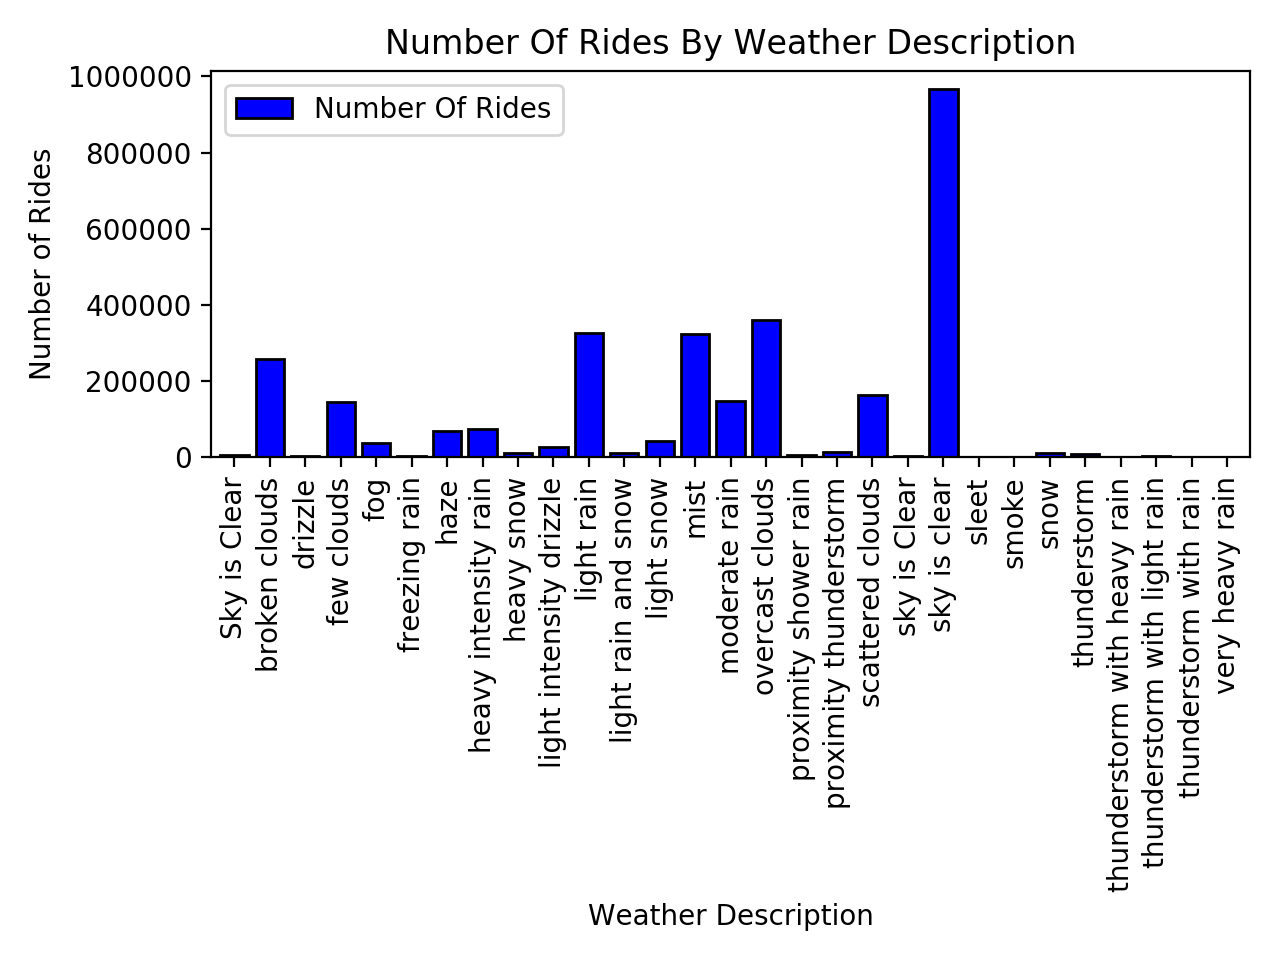

In [22]:
# Create a bar chart based off of the group series from before
weather_bar = weather_des_rides.plot(kind='bar',width = 0.8,align='center', color = "blue",
                                    edgecolor = "black")
# set the x_label and y_label 
weather_bar.set_xlabel("Weather Description")
weather_bar.set_ylabel("Number of Rides")
weather_bar.set_title('Number Of Rides By Weather Description')



plt.show()
plt.tight_layout()
plt.savefig("Bar_2018_weather_description_rides.png")

<IPython.core.display.Javascript object>


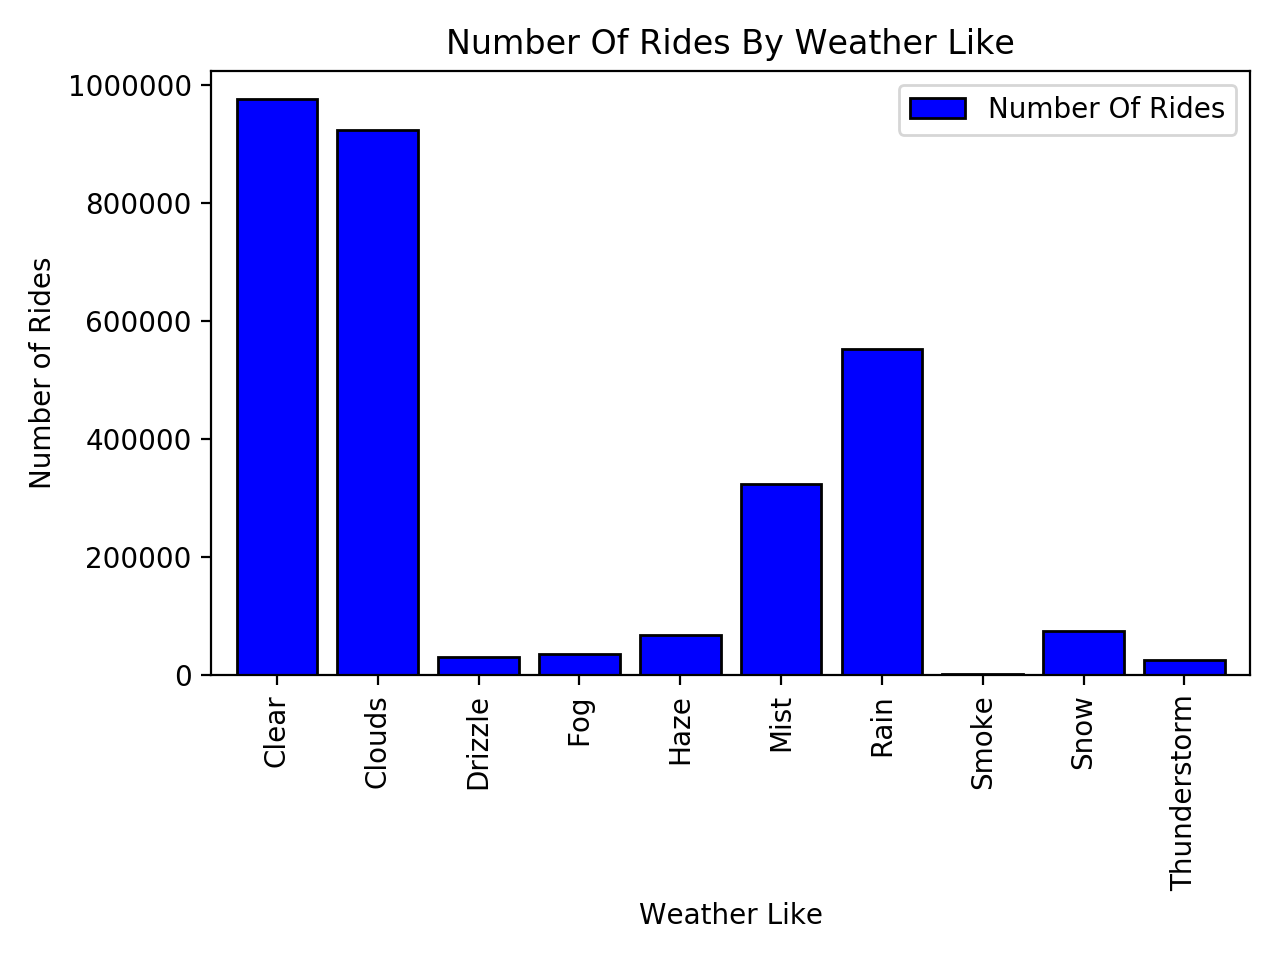

In [23]:
# Create a bar chart based off of the group series from before
weather_bar = weather_like_rides.plot(kind='bar',width = 0.8, align='center', color = "blue",
                                    edgecolor = "black")
# set the x_label and y_label 
weather_bar.set_xlabel("Weather Like")
weather_bar.set_ylabel("Number of Rides")
weather_bar.set_title('Number Of Rides By Weather Like')



plt.show()
plt.tight_layout()
plt.savefig("Bar_2018_weather_like_rides.png")

<IPython.core.display.Javascript object>


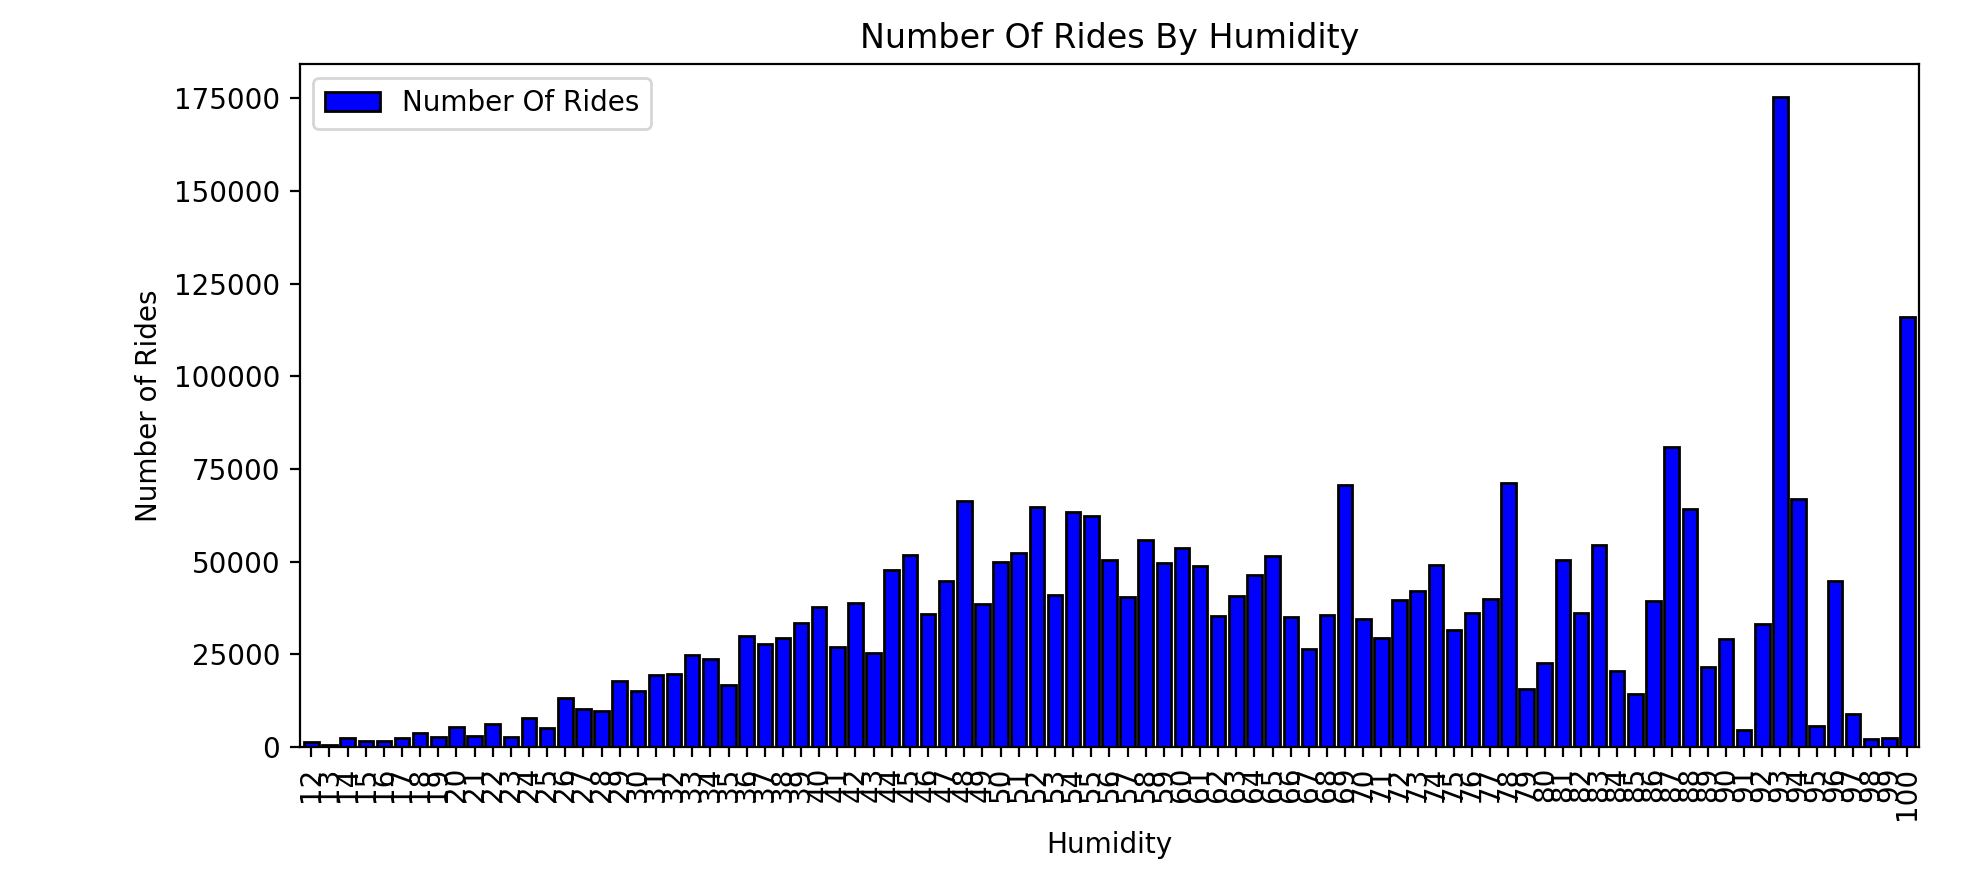

In [24]:
# Create a bar chart based off of the group series from before
weather_bar = humidity_rides.plot(kind='bar',width = 0.8, align='center', color = "blue",
                                    edgecolor = "black")
# set the x_label and y_label 
weather_bar.set_xlabel("Humidity")
weather_bar.set_ylabel("Number of Rides")
weather_bar.set_title('Number Of Rides By Humidity')



plt.show()
plt.tight_layout()
plt.savefig("Bar_2018_weather_humidity_rides.png")

<IPython.core.display.Javascript object>


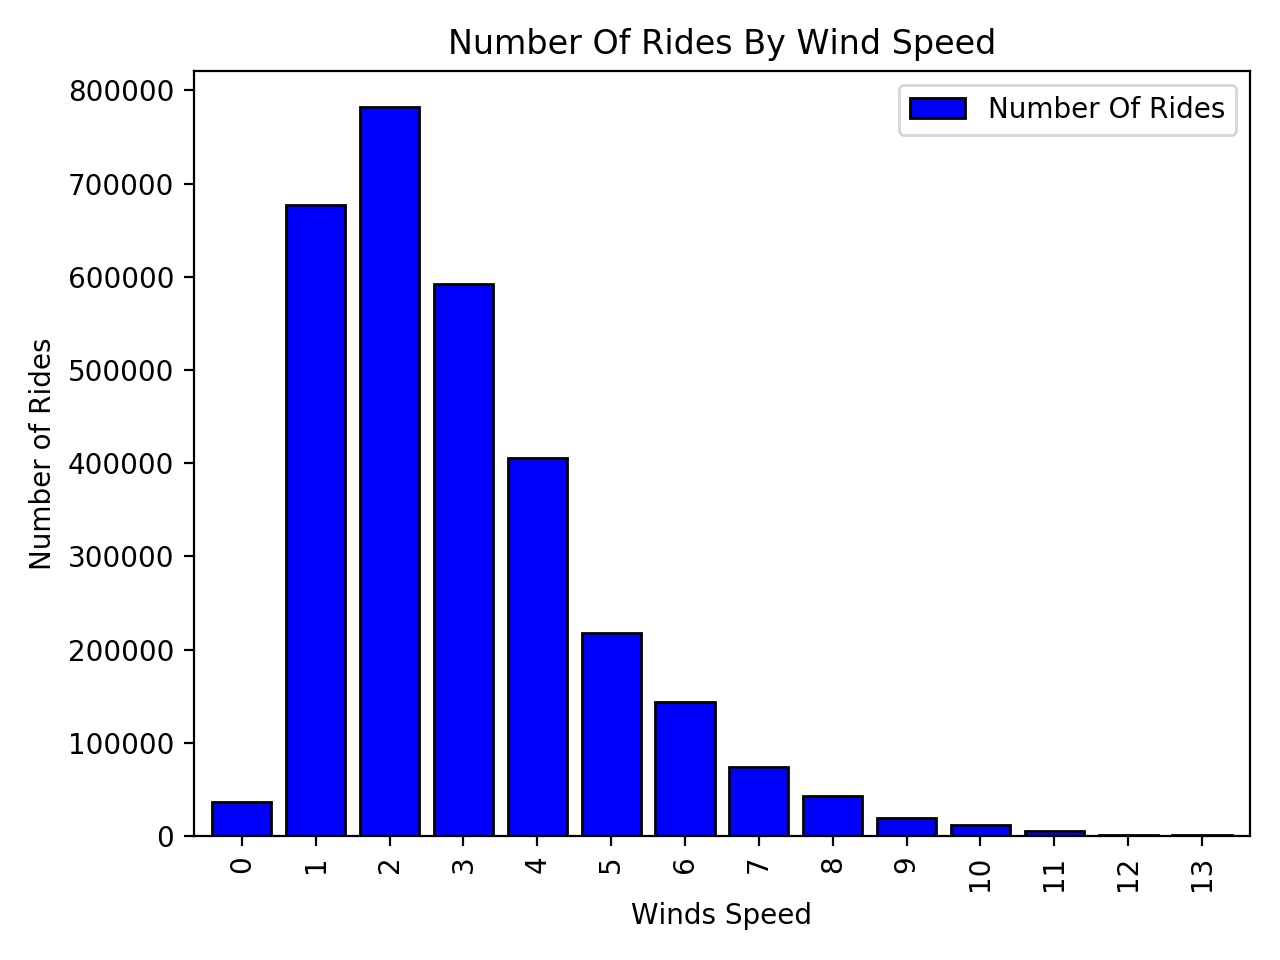

In [25]:
# Create a bar chart based off of the group series from before
weather_bar = wind_rides.plot(kind='bar',width = 0.8, align='center', color = "blue",
                                    edgecolor = "black")
# set the x_label and y_label 
weather_bar.set_xlabel("Winds Speed")
weather_bar.set_ylabel("Number of Rides")
weather_bar.set_title('Number Of Rides By Wind Speed')



plt.show()
plt.tight_layout()
plt.savefig("Bar_2018_weather_wind_speed_rides.png")

<IPython.core.display.Javascript object>


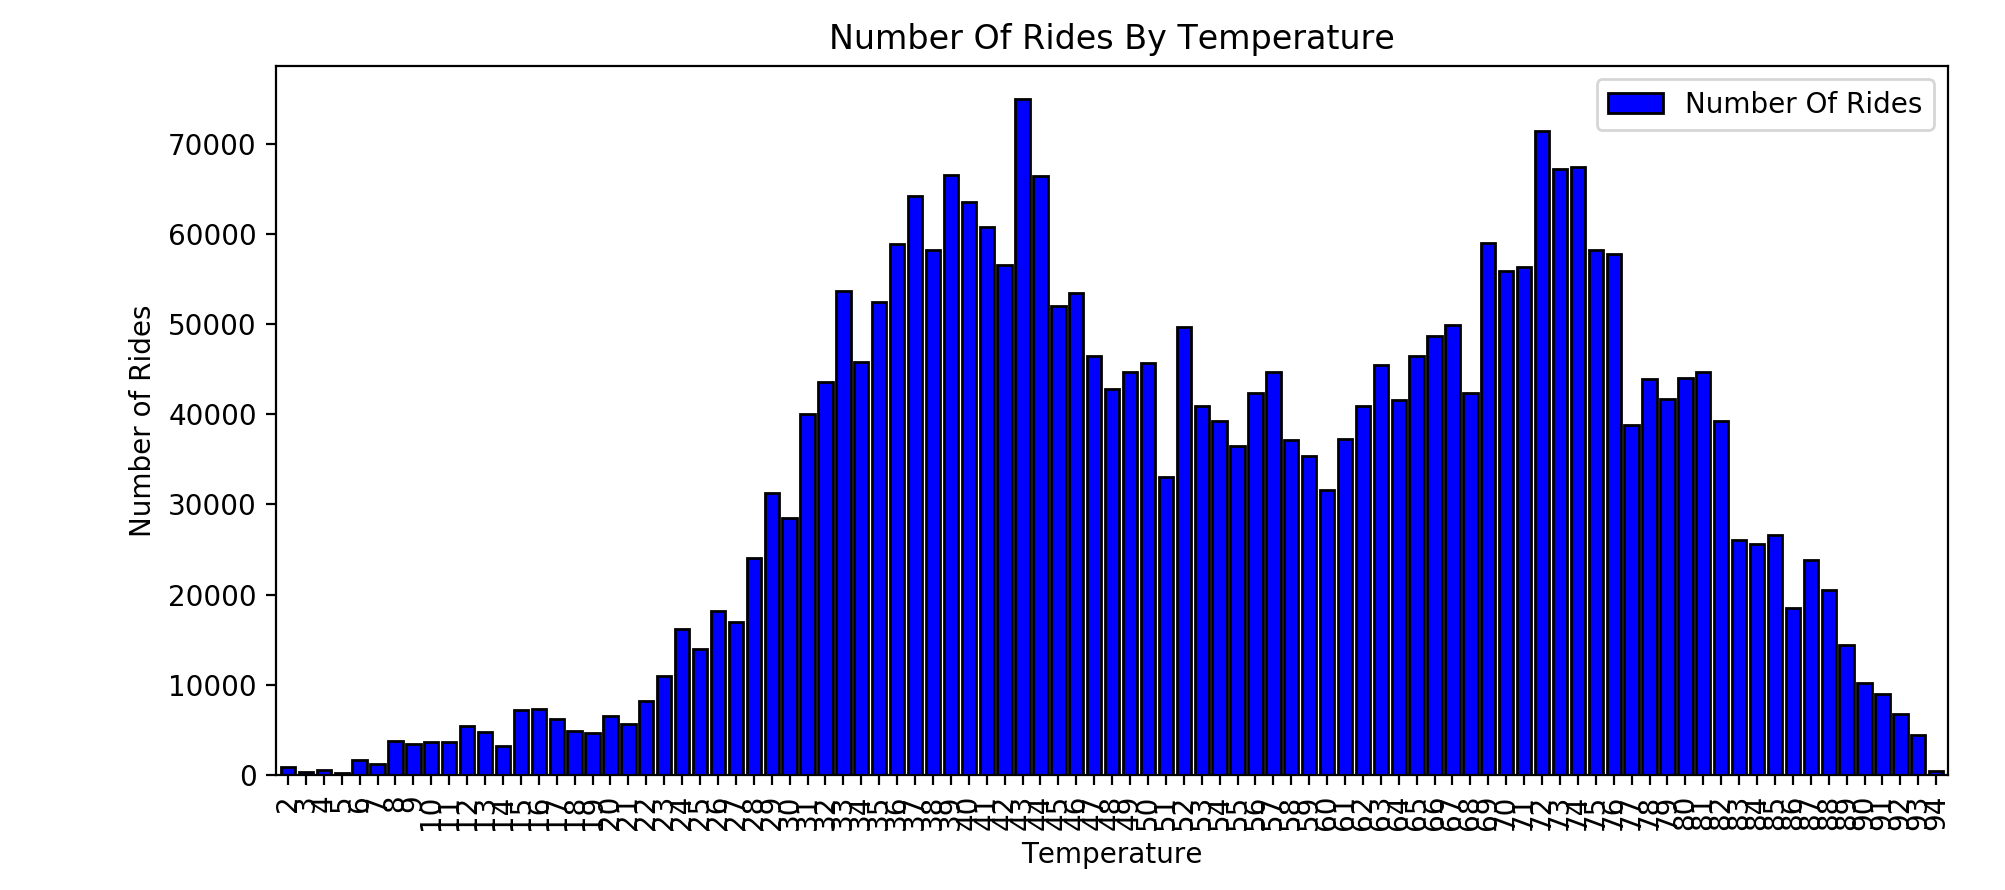

In [26]:
# Create a bar chart based off of the group series from before
weather_bar = temperature_rides.plot(kind='bar',width = 0.8, align='center', color = "blue",
                                    edgecolor = "black")
# set the x_label and y_label 
weather_bar.set_xlabel("Temperature")
weather_bar.set_ylabel("Number of Rides")
weather_bar.set_title('Number Of Rides By Temperature')



plt.show()
plt.tight_layout()
plt.savefig("Bar_2018_weather_temperature_rides.png")